In [61]:
%cd ~\ZZSC9020_Project\Group10_project

import os
import shutil
import numpy as np
import pandas as pd
import pmdarima as pmd
from datetime import datetime as dt
import statsmodels.tsa as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

C:\Users\KJR\ZZSC9020_Project\Group10_project


In [119]:
PATH = os.getcwd()+"/data/SILO/"

QLD_DATA = pd.read_csv(PATH+"QLD_Rolling_Data.csv",header=0)
NSW_DATA = pd.read_csv(PATH+"NSW_Rolling_Data.csv",header=0)

In [158]:
QLD_Forecasting_supplementary = pd.read_csv(PATH+"totaldemand_qld.csv",header=0)
QLD_Forecasting_supplementary['DATETIME'] = pd.to_datetime(QLD_Forecasting_supplementary['DATETIME'])
#QLD_Forecasting_supplementary = QLD_Forecasting_supplementary[QLD_Forecasting_supplementary['DATETIME'].dt.year > 2016]
QLD_Forecasting_supplementary = QLD_Forecasting_supplementary.groupby(by=pd.Grouper(freq='6H',key='DATETIME')).max()
QLD_Forecasting_supplementary

C:\Users\KJR\AppData\Local\Temp\ipykernel_3904\1345909658.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  QLD_Forecasting_supplementary = QLD_Forecasting_supplementary.groupby(by=pd.Grouper(freq='6H',key='DATETIME')).max()


,TOTALDEMAND,REGIONID
DATETIME,,
2010-01-01 00:00:00,5561.21,QLD1
2010-01-01 06:00:00,6259.79,QLD1
2010-01-01 12:00:00,6349.81,QLD1
2010-01-01 18:00:00,6377.41,QLD1
2010-01-02 00:00:00,5447.35,QLD1
...,...,...
2021-03-17 00:00:00,5764.92,QLD1
2021-03-17 06:00:00,6828.90,QLD1
2021-03-17 12:00:00,7261.41,QLD1


In [159]:
qld_temp_supplementary = pd.read_csv(PATH+'temperature_qld.csv',header=0)
qld_temp_supplementary['DATETIME'] = pd.to_datetime(qld_temp_supplementary['DATETIME'], format='mixed', dayfirst=True)
qld_temp_supplementary.drop('LOCATION',axis=1,inplace=True)
qld_temp_supplementary = qld_temp_supplementary.groupby(by=pd.Grouper(freq='6H',key='DATETIME')).mean()
qld_temp_supplementary

C:\Users\KJR\AppData\Local\Temp\ipykernel_3904\1462725305.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  qld_temp_supplementary = qld_temp_supplementary.groupby(by=pd.Grouper(freq='6H',key='DATETIME')).mean()


,TEMPERATURE
DATETIME,
2010-01-01 00:00:00,22.216667
2010-01-01 06:00:00,26.591667
2010-01-01 12:00:00,27.341667
2010-01-01 18:00:00,24.100000
2010-01-02 00:00:00,23.400000
...,...
2021-03-17 00:00:00,18.733333
2021-03-17 06:00:00,19.600000
2021-03-17 12:00:00,20.556250


In [160]:
QLD_DATA['DATETIME'] = pd.to_datetime(QLD_DATA['DATETIME'])
QLD_DATA.index = QLD_DATA['DATETIME']
QLD_DATA.drop('DATETIME',axis=1,inplace=True)


KeyError: 'DATETIME'

In [161]:
QLD = QLD_DATA.resample('6H').ffill()
QLD

C:\Users\KJR\AppData\Local\Temp\ipykernel_3904\660379974.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  QLD = QLD_DATA.resample('6H').ffill()


,TOTALDEMAND,TEMPERATURE,Rain,Evap,Radn,VP,RH,bushfire,flood,temp_change,high_temp_change,humid_change,high_humid_change,rain_change,high_rain_change,high_humid_past_week,high_rain_past_week,high_temp_past_week
DATETIME,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,5760.08,25.02,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-01 06:00:00,5760.08,25.02,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-01 12:00:00,5760.08,25.02,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-01 18:00:00,5760.08,25.02,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-02 00:00:00,5965.03,26.35,0.2,7.4,24.6,23.8,70.15,0.0,0.0,1.33,0,0.40,0,0.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 00:00:00,6387.94,19.72,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,0,18.85,1,1.2,0,1,0,0
2021-03-17 06:00:00,6387.94,19.72,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,0,18.85,1,1.2,0,1,0,0
2021-03-17 12:00:00,6387.94,19.72,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,0,18.85,1,1.2,0,1,0,0


In [162]:
QLD['TOTALDEMAND'] = QLD_Forecasting_supplementary['TOTALDEMAND']
QLD['TEMPERATURE'] = qld_temp_supplementary['TEMPERATURE']

In [163]:
QLD

,TOTALDEMAND,TEMPERATURE,Rain,Evap,Radn,VP,RH,bushfire,flood,temp_change,high_temp_change,humid_change,high_humid_change,rain_change,high_rain_change,high_humid_past_week,high_rain_past_week,high_temp_past_week
DATETIME,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,5561.21,22.216667,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-01 06:00:00,6259.79,26.591667,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-01 12:00:00,6349.81,27.341667,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-01 18:00:00,6377.41,24.100000,0.0,6.4,20.3,23.1,69.75,0.0,0.0,0.00,0,0.00,0,0.0,0,0,0,0
2010-01-02 00:00:00,5447.35,23.400000,0.2,7.4,24.6,23.8,70.15,0.0,0.0,1.33,0,0.40,0,0.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 00:00:00,5764.92,18.733333,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,0,18.85,1,1.2,0,1,0,0
2021-03-17 06:00:00,6828.90,19.600000,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,0,18.85,1,1.2,0,1,0,0
2021-03-17 12:00:00,7261.41,20.556250,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,0,18.85,1,1.2,0,1,0,0


In [71]:
BASELINE = pd.read_csv(PATH+"forecastdemand_qld.csv",header=0)
BASELINE = BASELINE[BASELINE['PERIODID'] == 1]
BASELINE.drop(['PREDISPATCHSEQNO', 'REGIONID', 'PERIODID', 'LASTCHANGED'],axis=1,inplace=True)
BASELINE['DATETIME'] = pd.to_datetime(BASELINE['DATETIME'])
BASELINE = BASELINE.groupby(by=pd.Grouper(freq='D', key='DATETIME')).max()
base_prediction = BASELINE['FORECASTDEMAND']
base_prediction.head(5)


DATETIME
2017-01-01    8094.01
2017-01-02    7992.85
2017-01-03    7364.11
2017-01-04    7431.58
2017-01-05    7615.26
Freq: D, Name: FORECASTDEMAND, dtype: float64

In [72]:
QLD_DATA.drop(['high_humid_change', 'high_temp_change', 'high_rain_change'],axis=1,inplace=True)
QLD_DATA['DATETIME'] = pd.to_datetime(QLD_DATA['DATETIME'])
QLD_DATA = QLD_DATA[QLD_DATA['DATETIME'].dt.year > 2016]
QLD_DATA

,DATETIME,TOTALDEMAND,TEMPERATURE,Rain,Evap,Radn,VP,RH,bushfire,flood,temp_change,humid_change,rain_change,high_humid_past_week,high_rain_past_week,high_temp_past_week
2557,2017-01-01,8042.19,28.84,0.0,9.6,31.0,28.1,75.80,1.0,0.0,0.33,0.10,0.0,1,1,0
2558,2017-01-02,7890.34,27.07,0.0,9.2,28.1,29.7,80.10,1.0,0.0,-1.77,4.30,0.0,1,1,0
2559,2017-01-03,7312.98,23.38,15.0,2.8,6.3,24.7,81.40,1.0,0.0,-3.69,1.30,15.0,1,1,0
2560,2017-01-04,7409.95,25.54,10.4,8.4,20.4,19.4,62.30,1.0,0.0,2.16,-19.10,-4.6,1,1,0
2561,2017-01-05,7568.24,24.79,0.4,5.4,20.3,22.0,71.20,1.0,0.0,-0.75,8.90,-10.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,2021-03-14,8250.77,25.19,0.0,6.1,24.2,24.6,80.55,1.0,0.0,1.27,3.15,0.0,1,1,0
4091,2021-03-15,7889.71,21.27,2.6,2.3,4.8,23.8,84.00,1.0,0.0,-3.92,3.45,2.6,0,1,0
4092,2021-03-16,7650.24,20.39,6.8,2.1,8.3,18.8,72.65,1.0,0.0,-0.88,-11.35,4.2,0,0,0
4093,2021-03-17,7486.67,19.72,8.0,1.4,4.0,22.2,91.50,1.0,0.0,-0.67,18.85,1.2,1,0,0


In [166]:
QLD.drop(['high_humid_change', 'high_temp_change', 'high_rain_change'],axis=1,inplace=True)
QLD = QLD[QLD.index.year > 2016]

In [167]:
QLD

,TOTALDEMAND,TEMPERATURE,Rain,Evap,Radn,VP,RH,bushfire,flood,temp_change,humid_change,rain_change,high_humid_past_week,high_rain_past_week,high_temp_past_week
DATETIME,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6728.99,25.158333,0.0,9.6,31.0,28.1,75.8,1.0,0.0,0.33,0.10,0.0,1,1,0
2017-01-01 06:00:00,7047.07,30.766667,0.0,9.6,31.0,28.1,75.8,1.0,0.0,0.33,0.10,0.0,1,1,0
2017-01-01 12:00:00,8042.19,32.225000,0.0,9.6,31.0,28.1,75.8,1.0,0.0,0.33,0.10,0.0,1,1,0
2017-01-01 18:00:00,8030.82,27.191667,0.0,9.6,31.0,28.1,75.8,1.0,0.0,0.33,0.10,0.0,1,1,0
2017-01-02 00:00:00,6445.77,26.325000,0.0,9.2,28.1,29.7,80.1,1.0,0.0,-1.77,4.30,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17 00:00:00,5764.92,18.733333,8.0,1.4,4.0,22.2,91.5,1.0,0.0,-0.67,18.85,1.2,1,0,0
2021-03-17 06:00:00,6828.90,19.600000,8.0,1.4,4.0,22.2,91.5,1.0,0.0,-0.67,18.85,1.2,1,0,0
2021-03-17 12:00:00,7261.41,20.556250,8.0,1.4,4.0,22.2,91.5,1.0,0.0,-0.67,18.85,1.2,1,0,0


In [73]:
QLD_CLIMATE_ONLY = QLD_DATA.drop(['bushfire', 'flood', 'temp_change', 'humid_change', 'rain_change', 'high_humid_past_week', 'high_rain_past_week', 'high_temp_past_week'],axis=1)
QLD_CLIMATE_ONLY

,DATETIME,TOTALDEMAND,TEMPERATURE,Rain,Evap,Radn,VP,RH
2557,2017-01-01,8042.19,28.84,0.0,9.6,31.0,28.1,75.80
2558,2017-01-02,7890.34,27.07,0.0,9.2,28.1,29.7,80.10
2559,2017-01-03,7312.98,23.38,15.0,2.8,6.3,24.7,81.40
2560,2017-01-04,7409.95,25.54,10.4,8.4,20.4,19.4,62.30
2561,2017-01-05,7568.24,24.79,0.4,5.4,20.3,22.0,71.20
...,...,...,...,...,...,...,...,...
4090,2021-03-14,8250.77,25.19,0.0,6.1,24.2,24.6,80.55
4091,2021-03-15,7889.71,21.27,2.6,2.3,4.8,23.8,84.00
4092,2021-03-16,7650.24,20.39,6.8,2.1,8.3,18.8,72.65
4093,2021-03-17,7486.67,19.72,8.0,1.4,4.0,22.2,91.50


In [74]:
QLD_CLIMATE_ONLY

,DATETIME,TOTALDEMAND,TEMPERATURE,Rain,Evap,Radn,VP,RH
2557,2017-01-01,8042.19,28.84,0.0,9.6,31.0,28.1,75.80
2558,2017-01-02,7890.34,27.07,0.0,9.2,28.1,29.7,80.10
2559,2017-01-03,7312.98,23.38,15.0,2.8,6.3,24.7,81.40
2560,2017-01-04,7409.95,25.54,10.4,8.4,20.4,19.4,62.30
2561,2017-01-05,7568.24,24.79,0.4,5.4,20.3,22.0,71.20
...,...,...,...,...,...,...,...,...
4090,2021-03-14,8250.77,25.19,0.0,6.1,24.2,24.6,80.55
4091,2021-03-15,7889.71,21.27,2.6,2.3,4.8,23.8,84.00
4092,2021-03-16,7650.24,20.39,6.8,2.1,8.3,18.8,72.65
4093,2021-03-17,7486.67,19.72,8.0,1.4,4.0,22.2,91.50


In [169]:
train = QLD[:-434]
test = QLD[-434:]
print(train.head())
print(test.head())

                     TOTALDEMAND  TEMPERATURE  Rain  Evap  Radn    VP    RH  \
DATETIME                                                                      
2017-01-01 00:00:00      6728.99    25.158333   0.0   9.6  31.0  28.1  75.8   
2017-01-01 06:00:00      7047.07    30.766667   0.0   9.6  31.0  28.1  75.8   
2017-01-01 12:00:00      8042.19    32.225000   0.0   9.6  31.0  28.1  75.8   
2017-01-01 18:00:00      8030.82    27.191667   0.0   9.6  31.0  28.1  75.8   
2017-01-02 00:00:00      6445.77    26.325000   0.0   9.2  28.1  29.7  80.1   

                     bushfire  flood  temp_change  humid_change  rain_change  \
DATETIME                                                                       
2017-01-01 00:00:00       1.0    0.0         0.33           0.1          0.0   
2017-01-01 06:00:00       1.0    0.0         0.33           0.1          0.0   
2017-01-01 12:00:00       1.0    0.0         0.33           0.1          0.0   
2017-01-01 18:00:00       1.0    0.0         0

In [171]:
print ("\nMissing values :  ", QLD_DATA.isnull().any())


Missing values :   TOTALDEMAND             False
TEMPERATURE              True
Rain                    False
Evap                    False
Radn                    False
VP                      False
RH                      False
bushfire                False
flood                   False
temp_change              True
high_temp_change        False
humid_change            False
high_humid_change       False
rain_change             False
high_rain_change        False
high_humid_past_week    False
high_rain_past_week     False
high_temp_past_week     False
dtype: bool


In [172]:
y_train = train['TOTALDEMAND']
y_test = test['TOTALDEMAND']

In [175]:
ts_decomposition = seasonal_decompose(x=train['TOTALDEMAND'], model='multiplicative', period=3)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

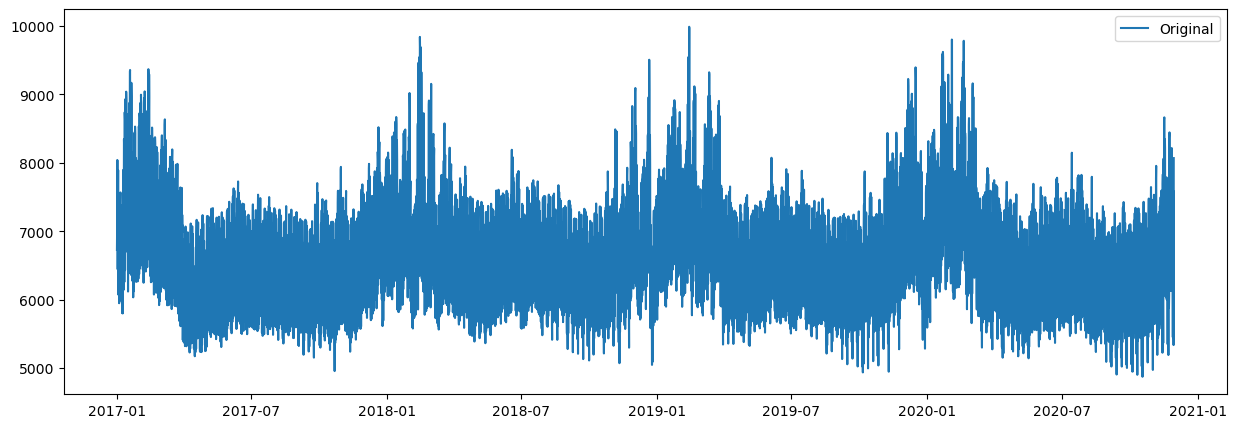

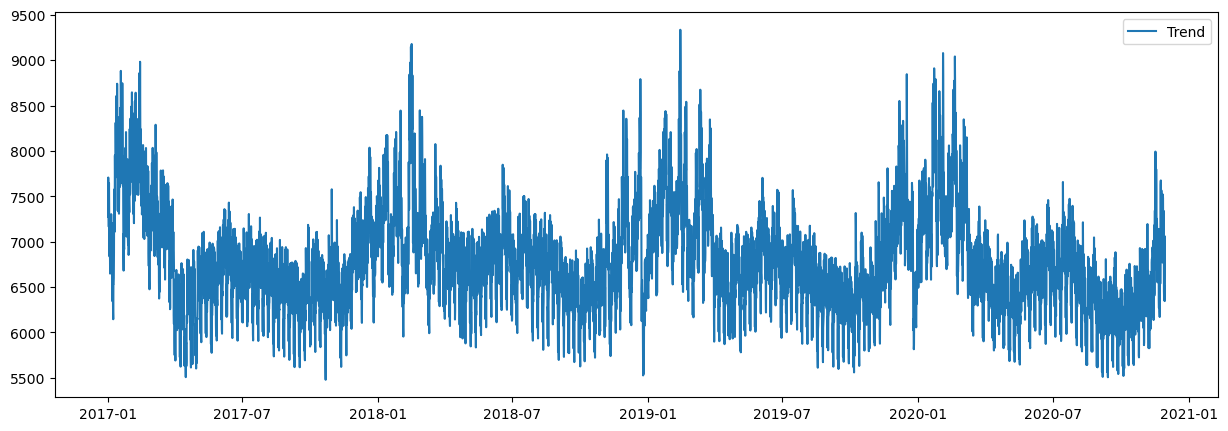

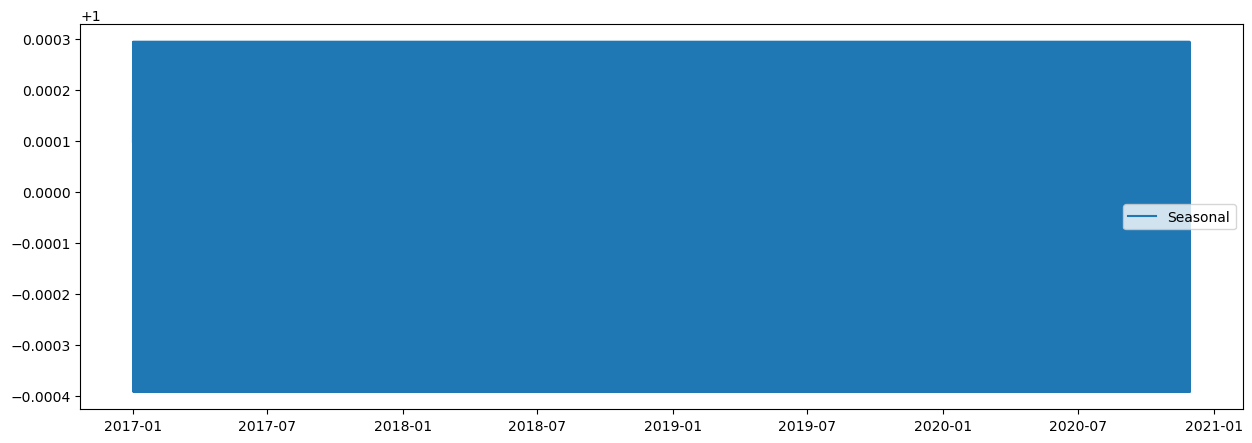

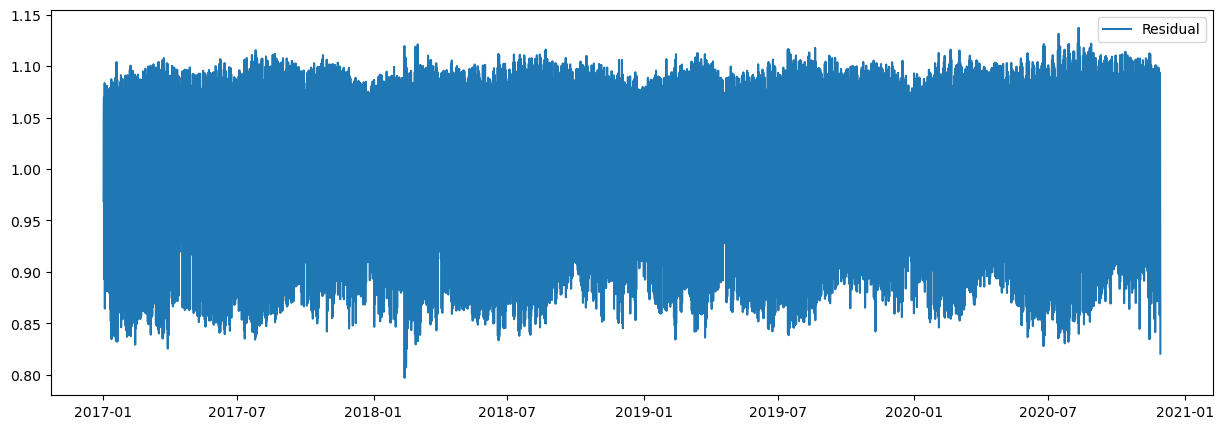

In [176]:
plt.figure(figsize=(15,5))
plt.plot(y_train, label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

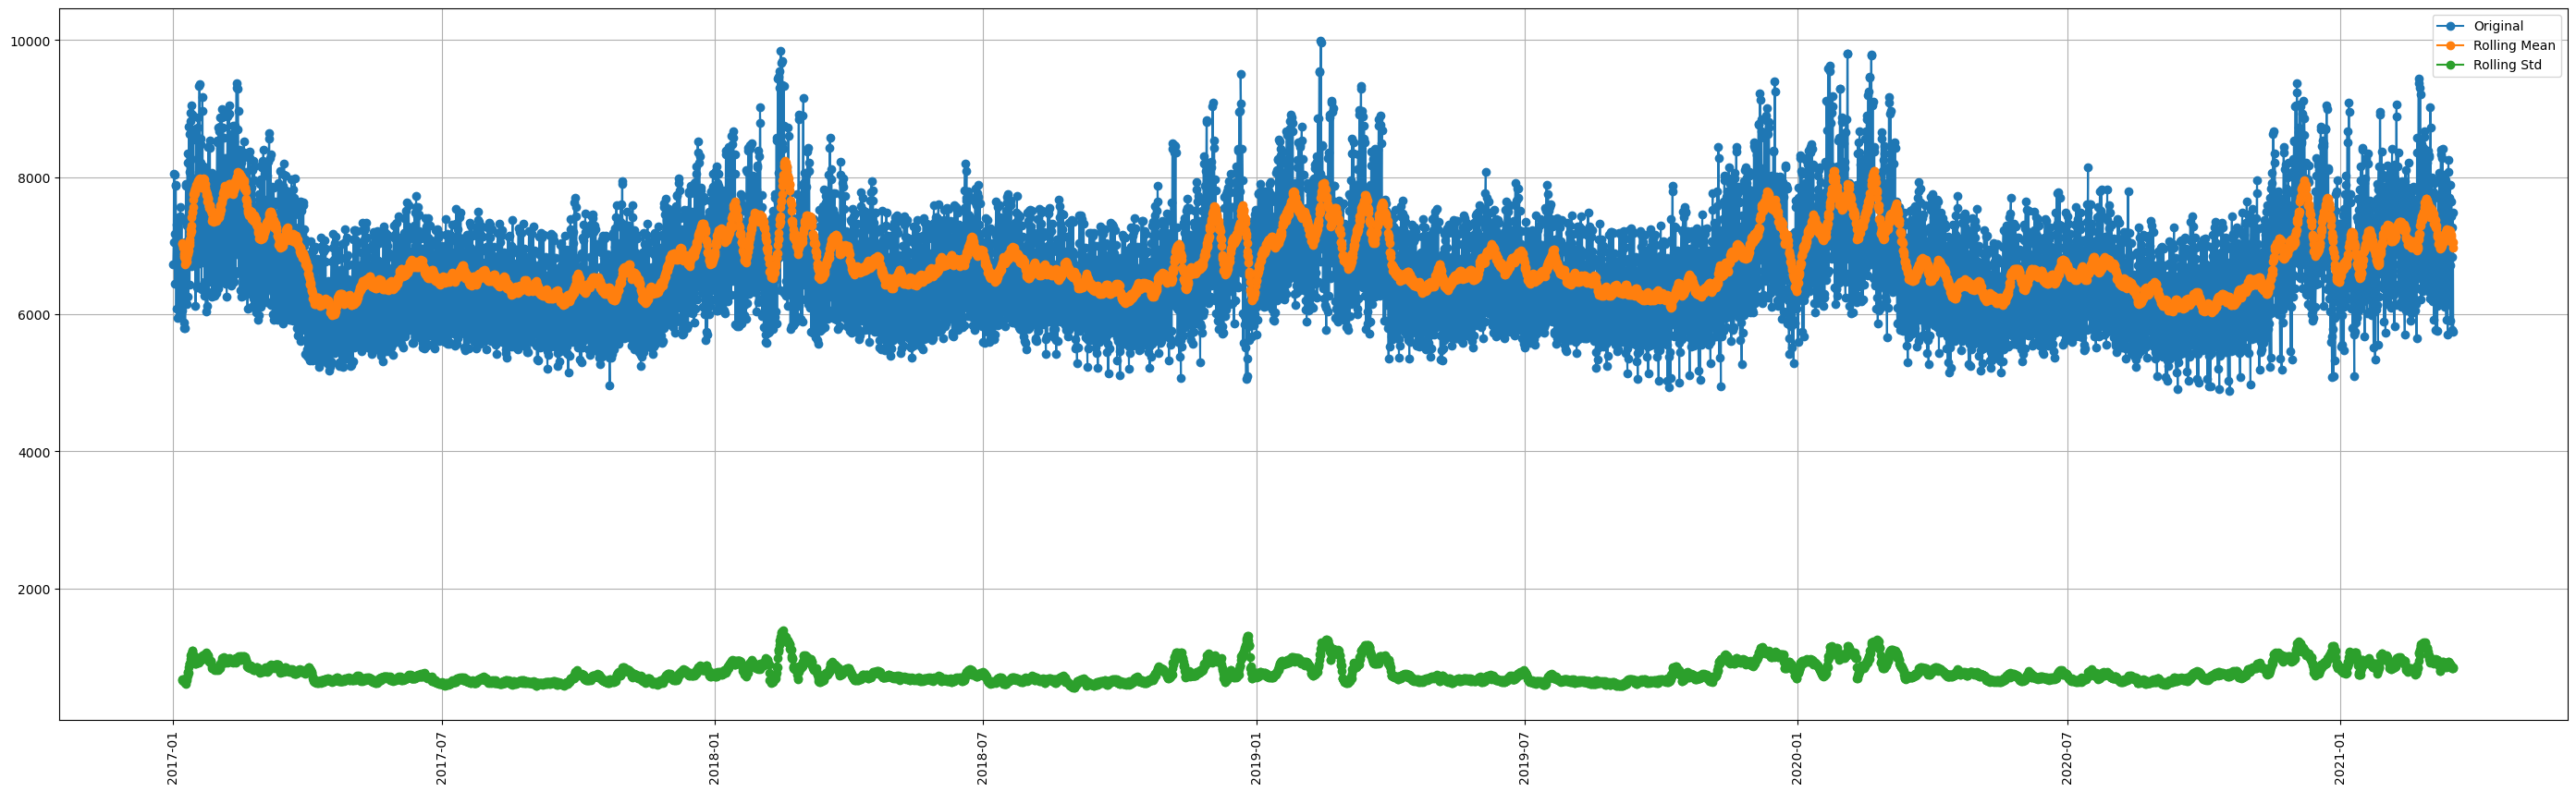

In [178]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(QLD.index, QLD['TOTALDEMAND'], marker='o', label='Original')
plt.plot(QLD.index, QLD['TOTALDEMAND'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(QLD.index, QLD['TOTALDEMAND'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.legend()
plt.show()

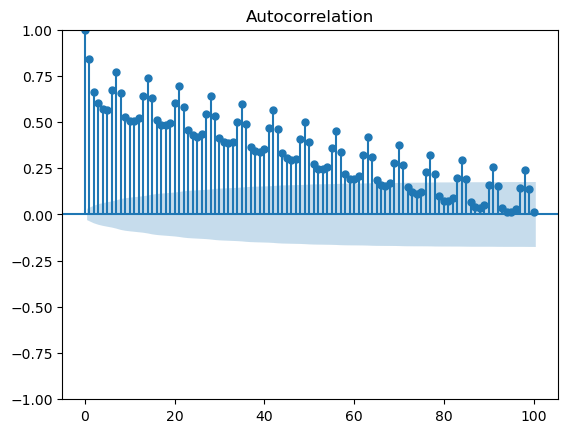

In [180]:
plot_acf(QLD_DATA['TOTALDEMAND'], lags=100)
plt.show()

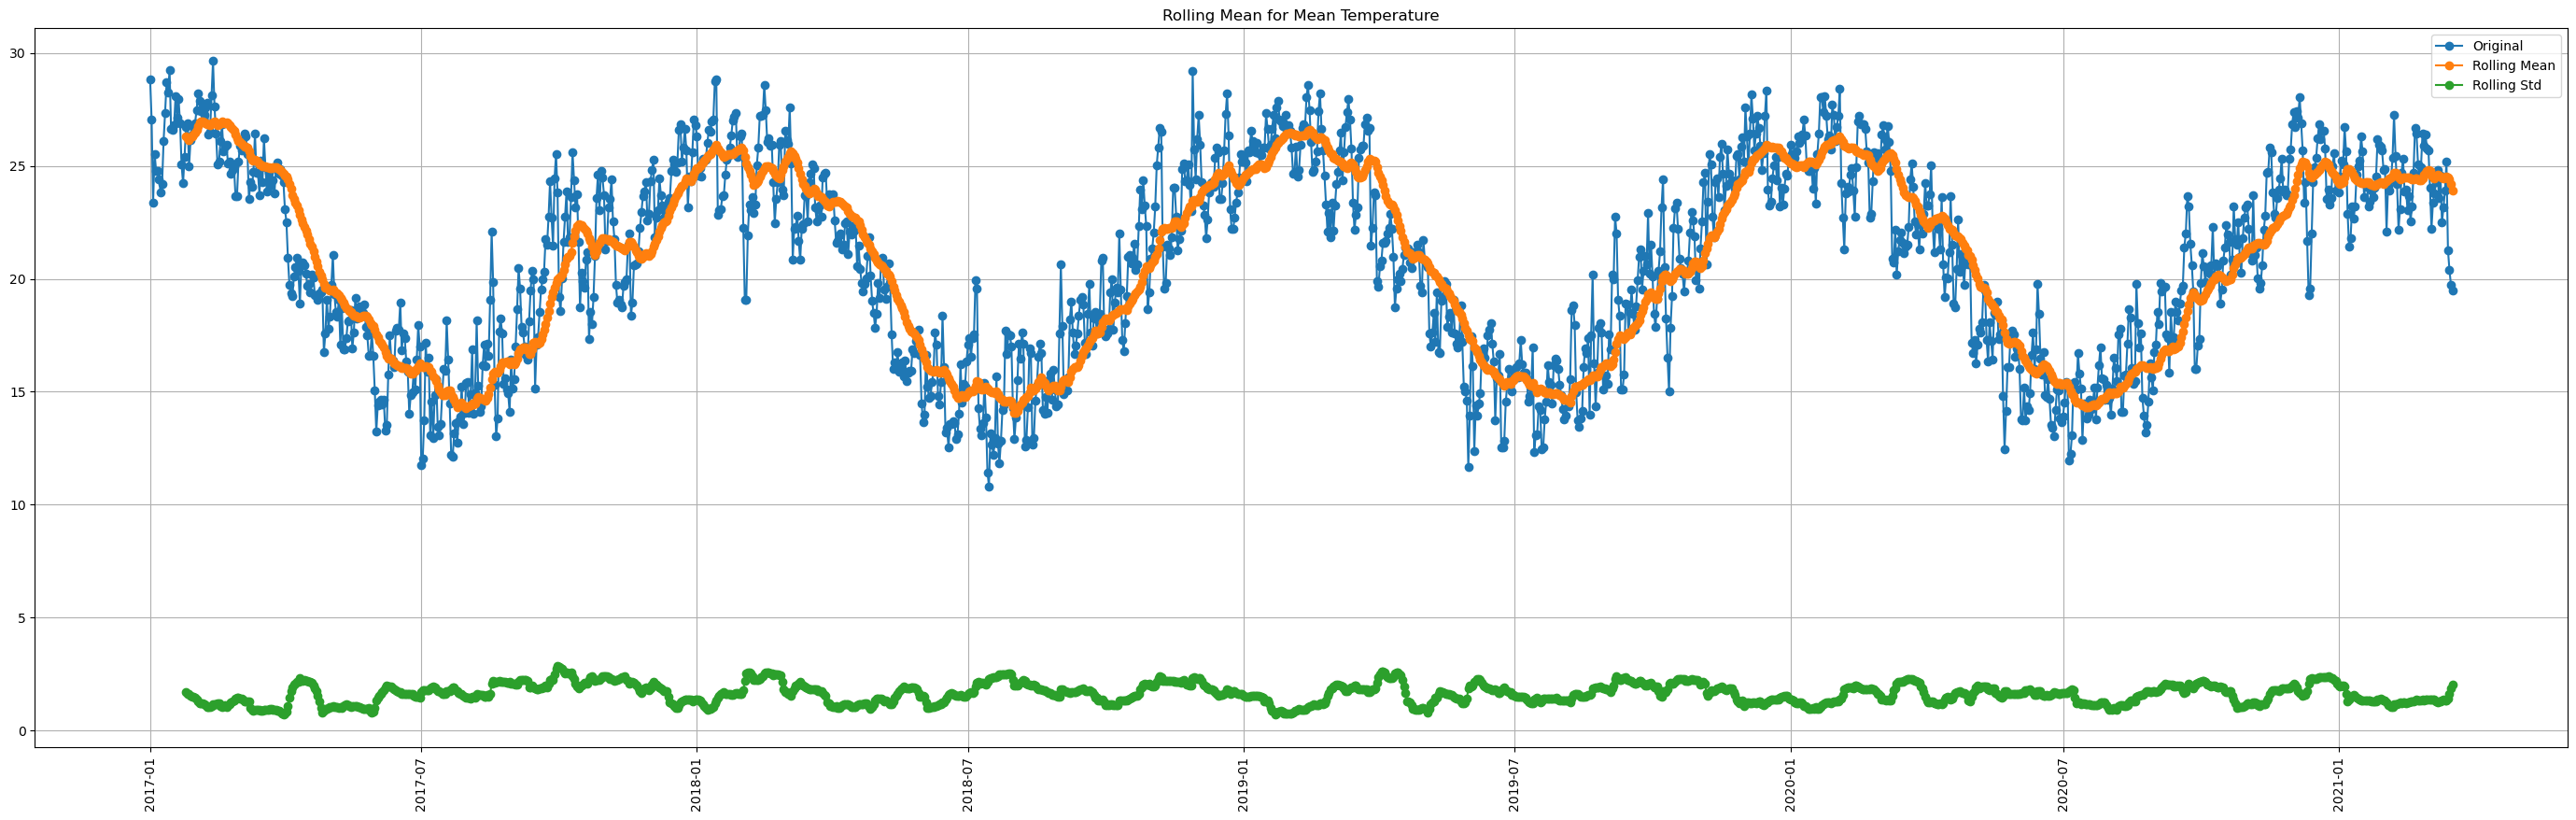

In [82]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['TEMPERATURE'], marker='o', label='Original')
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['TEMPERATURE'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['TEMPERATURE'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Temperature")
plt.legend()
plt.show()

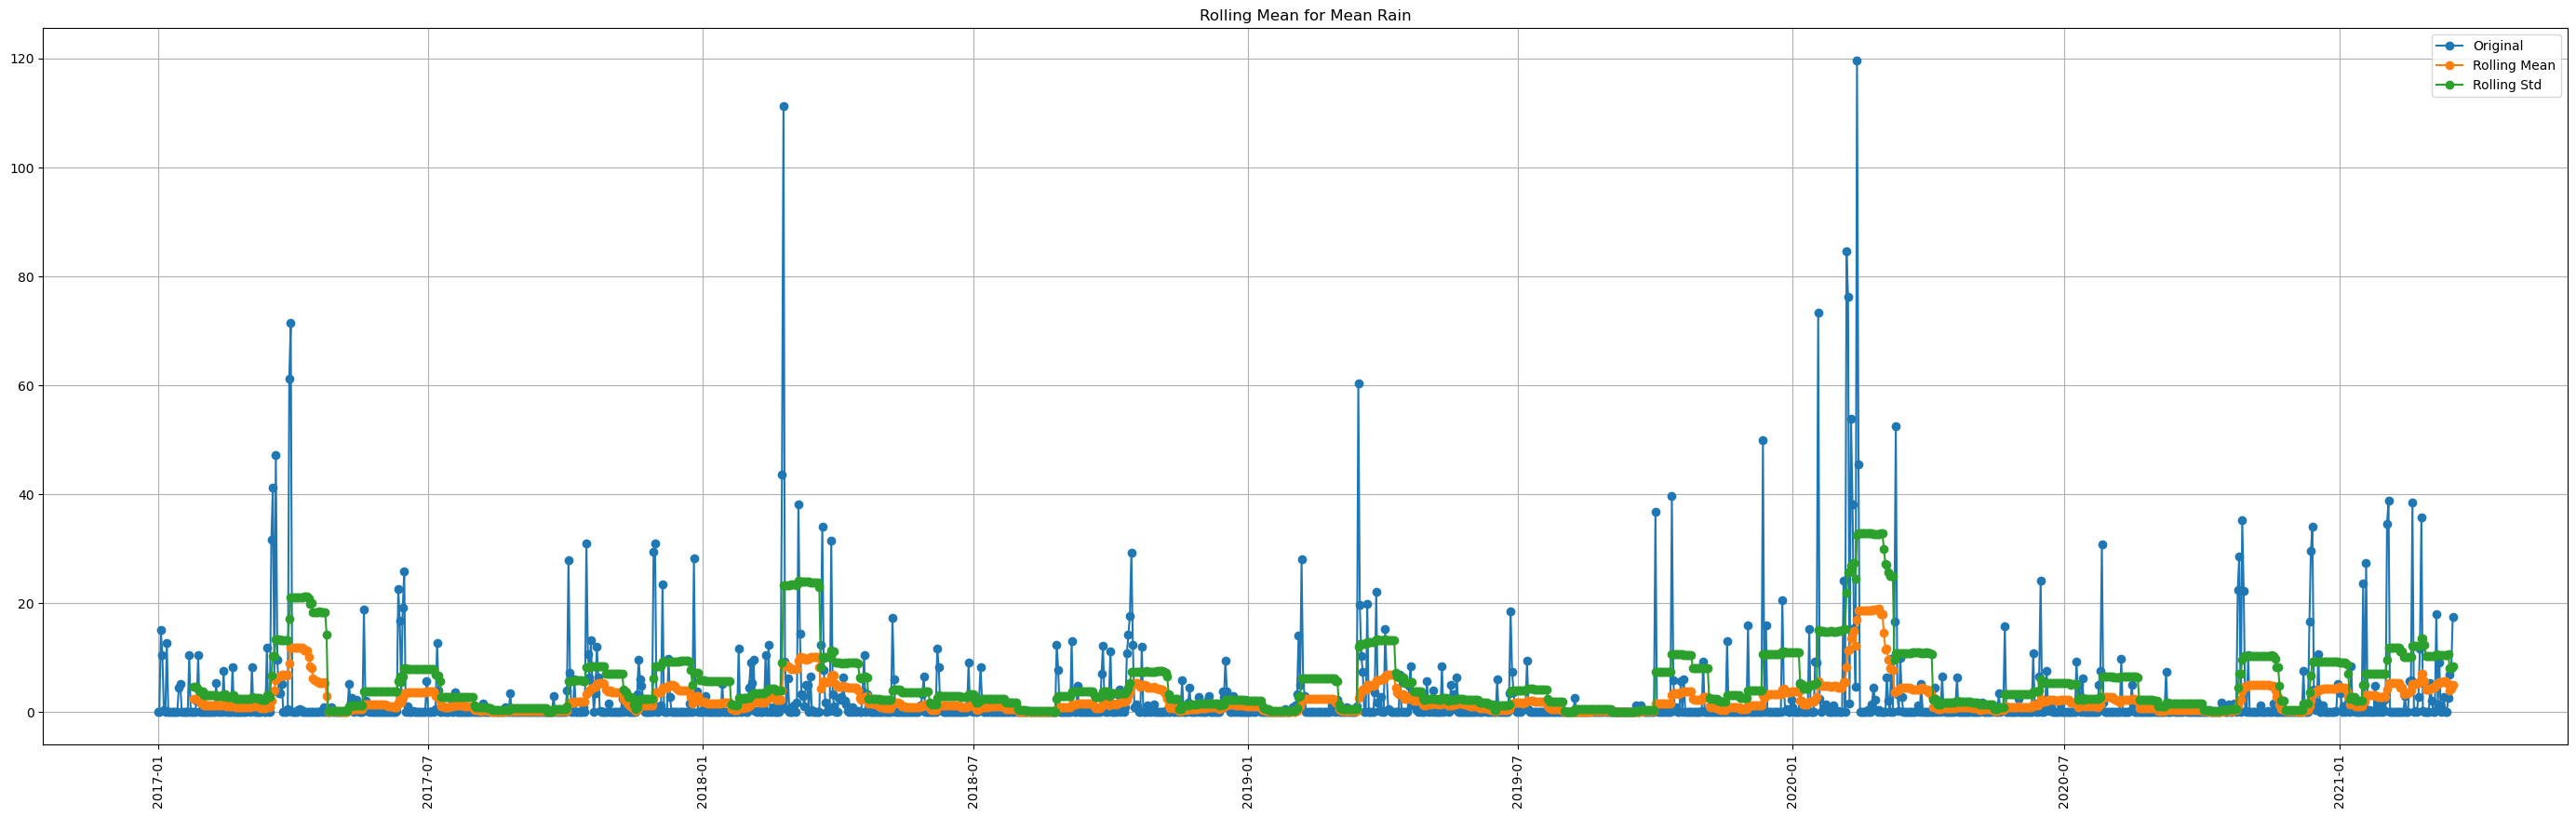

In [33]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['Rain'], marker='o', label='Original')
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['Rain'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['Rain'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Rain")
plt.legend()
plt.show()

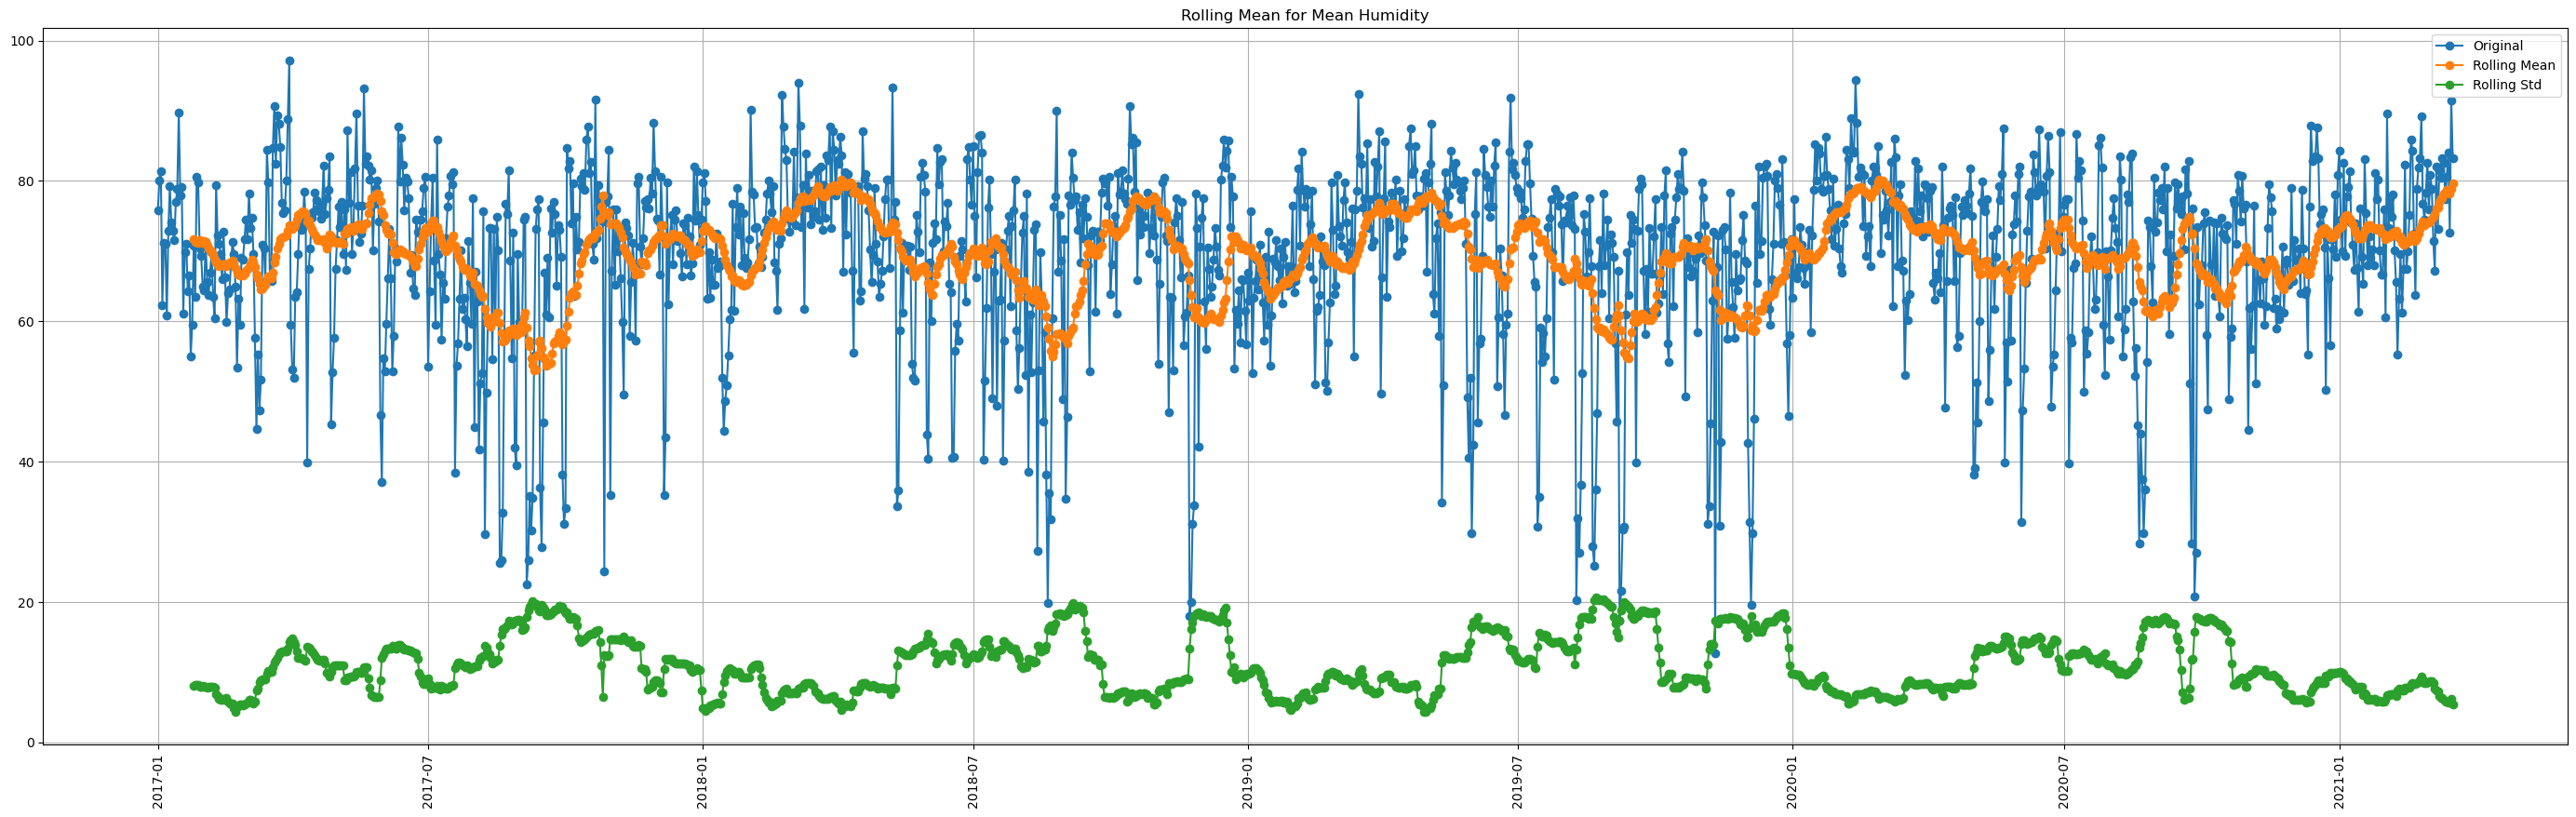

In [34]:
plt.figure(figsize=(35,10))
plt.grid()
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['RH'], marker='o', label='Original')
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['RH'].rolling(window=25).mean(), marker='o', label='Rolling Mean')
plt.plot(QLD_DATA['DATETIME'], QLD_DATA['RH'].rolling(window=25).std(), marker='o', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for Mean Humidity")
plt.legend()
plt.show()

In [181]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [182]:
for name, column in QLD.items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TOTALDEMAND" 
    -----------------------------------------------
ADF Statistic: -6.415656
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "TEMPERATURE" 
    -----------------------------------------------
ADF Statistic: -3.266367
p-value: 0.016450
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Rain" 
    -----------------------------------------------
ADF Statistic: -10.846007
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Evap" 
    -----------------------------------------------
ADF Statistic: -4.997630
p-value: 0.000022
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Radn" 
    -----------------------------------------------
ADF Statistic: -5.022572
p-value: 0.000020
Critical Values:
	1%: 

In [183]:
for name, column in QLD_DATA.drop(columns='DATETIME').diff().dropna().items():
    check_stationarity(column, name=column.name)
    print('\n')

KeyError: "['DATETIME'] not found in axis"

In [193]:
model = pmd.auto_arima(
    y_train,
    train.drop(['TOTALDEMAND'],axis=1),
    m=4,
    seasonal=True,
    start_p=0,
    max_p=4,
    start_P=0,
    d=1,
    #D=1, 
    start_q=0,
    max_q=19, 
    start_Q=0,
    max_Q=20,
    max_order=30, 
    test='adf',
    error_action='ignore',  
    suppress_warnings=True,
    stepwise=True, 
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94554.140, Time=0.43 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=83207.296, Time=15.59 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=86668.017, Time=17.30 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=94552.159, Time=5.52 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=93746.379, Time=4.78 sec


In [ ]:
first_arima_attempt =  "ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=56419.085, Time=124.56 sec"
second_arima_attempt = "ARIMA(3,1,2)(2,0,1)[4]             : AIC=55059.902, Time=21.55 sec"

In [101]:
base_prediction[-108:]

DATETIME
2020-12-01    9038.87
2020-12-02    9415.87
2020-12-03    8706.44
2020-12-04    9056.46
2020-12-05    8557.17
               ...   
2021-03-14    8326.88
2021-03-15    7876.63
2021-03-16    7663.41
2021-03-17    7463.15
2021-03-18    5714.08
Freq: D, Name: FORECASTDEMAND, Length: 108, dtype: float64

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                 5715
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2, 3], 3)   Log Likelihood              -42067.719
Date:                                   Wed, 02 Oct 2024   AIC                          84181.439
Time:                                           17:56:58   BIC                          84334.404
Sample:                                       01-01-2017   HQIC                         84234.690
                                            - 11-29-2020                                         
Covariance Type:                                     opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.1235     20

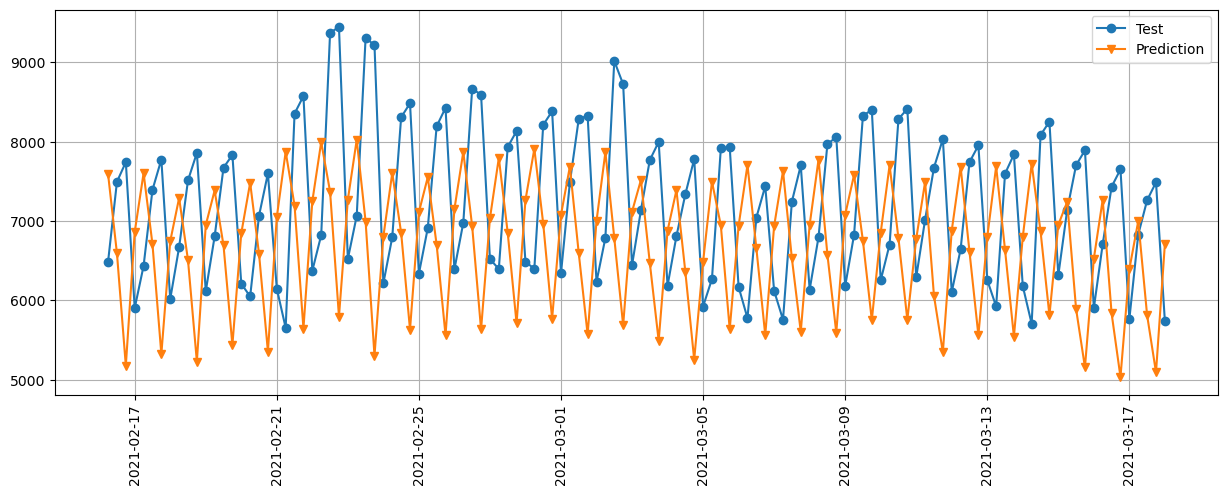

Mean Absolute Percentage Error 0.19046176092401915
Mean Squared Error 2715272.203683776
RMSE 1647.8083030752623
AIC values 84181.43887010418


,Test,Prediction,Difference,% Change
0,8266.48,7592.109141,674.370859,8.157896
1,6255.84,6593.314156,-337.474156,5.394546
2,6582.83,5178.410951,1404.419049,21.334579
3,8516.69,6860.036413,1656.653587,19.451848
4,8538.29,7602.844196,935.445804,10.955892
...,...,...,...,...
429,5764.92,NaN,NaN,NaN
430,6828.90,NaN,NaN,NaN
431,7261.41,NaN,NaN,NaN
432,7486.67,NaN,NaN,NaN


In [192]:
print(model.summary())
print(model.params)



pred=model.predict(n_periods=120, X=test.drop(columns=['TOTALDEMAND'])[-120:], alpha=0.05)
#pred = base_prediction[-108:]

plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(test['DATETIME'],y_test, marker='o', label='Test')
#plt.plot(test['DATETIME'],pred, marker='v', label='Prediction')

plt.plot(test.index[-120:],y_test[-120:], marker='o', label='Test')
plt.plot(test.index[-120:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(y_test[-120:], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['TOTALDEMAND'][-120:], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(model.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)


a=pd.DataFrame(y_test)
a=a.reset_index()
a=a.drop(columns='DATETIME')
a

prediction=pd.DataFrame(pred)
prediction=prediction.reset_index()
#prediction=prediction.drop(columns='DATETIME')
prediction=prediction.drop(columns='index')
prediction
output=pd.DataFrame()
output['Test']=a['TOTALDEMAND']
#output['Prediction']=prediction['FORECASTDEMAND']
output['Prediction']=prediction[0]
output['Difference']=output['Test']-output['Prediction']
output['% Change']=abs(output['Difference']/output['Test'])*100
output

In [ ]:
MAPE_WITH_WEEKLY_4 = "0.04106389573627411"
MAPE_WITHOUT_WEEKLY_12 = "0.04227460366844828"
MAPE_WIH_WEEKLY_12 = "0.04361910954572479"
MAPE_WITHOUT_WEEKLY_4 = "0.040339140348385885"

H6_INTERVAL_LOOKAHEAD_1MONTH_S3 = "0.19046176092401915"